# Example using Mann-Whitney test

## Study case

This study aims to compare the oil content between two olive cultivars, 
Carolea and Arbequina, two of the best-known varieties from the province of Catamarca, Argentina. Olive samples were collected independently from 
each cultivar, and oil content was determined using chemical extraction methods.

The objective of this analysis is to assess whether there are statistically 
significant differences in oil content between the two cultivars.

## Data analysis

First, an exploratory data analysis 
and normality assessment were performed. Based on these results, a 
non-parametric hypothesis test was selected.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, mannwhitneyu, shapiro, wilcoxon

In [4]:
# Data

Arbequina=np.array([34.5 , 20.1 , 21.8 , 18.2 , 19.5 , 20.2 , 22.5 , 23.9 , 22.1 , 24.2])
Carolea=np.array([16.4 , 14.8 , 17.8 , 12.3 , 11.9 , 15.5 , 13.4 , 16, 15.8 , 16.2])

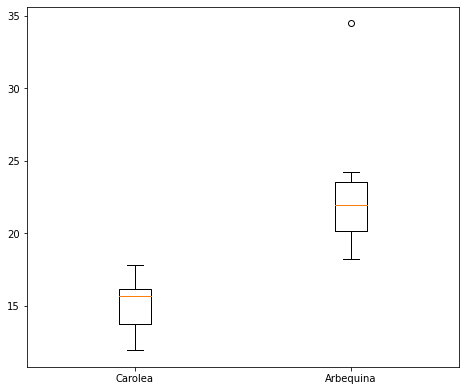

In [5]:
d= [Carolea, Arbequina]
fig = plt.figure(figsize =(6, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(d, labels=['Carolea', 'Arbequina'])

plt.show()

First, the normality of each group was assessed using the Shapiro–Wilk test. 
This step is important to determine whether parametric assumptions are met.

In [6]:
# normality test
stat, p = shapiro(Arbequina)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.768, p=0.006
Sample does not look Gaussian (reject H0)


In [7]:
stat, p = shapiro(Carolea)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.925, p=0.399
Sample looks Gaussian (fail to reject H0)


As shown by the Shapiro–Wilk test results, only one of the groups satisfies 
the normality assumption. The QQ-plots further support the conclusions 
obtained from the normality tests.


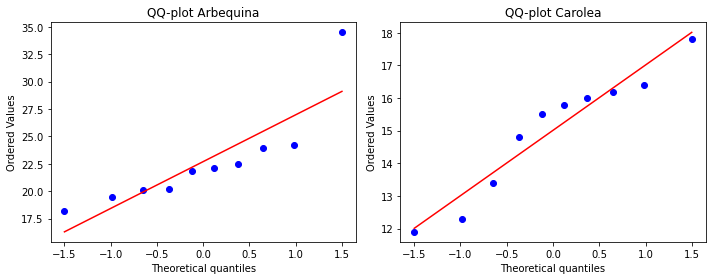

In [8]:
# Figura
plt.figure(figsize=(10, 4))

# QQ-plot Arbequina
plt.subplot(1, 2, 1)
probplot(Arbequina, dist="norm", plot=plt)
plt.title("QQ-plot Arbequina")

# QQ-plot Carolea
plt.subplot(1, 2, 2)
probplot(Carolea, dist="norm", plot=plt)
plt.title("QQ-plot Carolea")

plt.tight_layout()
plt.show()

Given that the normality assumption is not satisfied for both groups, 
the Mann–Whitney U test was applied to compare the medians of the two cultivars.


$\theta_A$ denotes the population median (central location) of the oil content of the Arbequina variety.

$\theta_C$ denotes the population median (central location) of the oil content of the Carolea variety.

Hypotheses

$H_0: \theta_A = \theta_C$

$H_a: \theta_A \neq \theta_C$


In [9]:
# Mann–Whitney U test
u_stat, p_value = mannwhitneyu(Arbequina, Carolea, alternative='two-sided')
print("U statistic:", u_stat)
print("p-value:", p_value)

U statistic: 100.0
p-value: 0.00018267179110955002


The rank-biserial correlation was computed as an effect size measure, 
providing information about the magnitude of the observed difference.


In [10]:
# Rank-biserial correlation
n1 = len(Arbequina)
n2 = len(Carolea)
r_rb = 1 - (2 * u_stat) / (n1 * n2)
print(f"Rank-biserial correlation (r_rb): {r_rb}")


Rank-biserial correlation (r_rb): -1.0


### Conclusion

A statistically significant difference in oil content was found between 
the two olive cultivars. Arbequina samples exhibited higher oil content 
than Carolea samples. Additionally, the effect size indicates that this 
difference is not only statistically significant but also practically relevant.

In [11]:
import pandas as pd

results = pd.DataFrame({
    "Test": ["Mann-Whitney U"],
    "U_statistic": [u_stat],
    "p_value": [p_value],
    "Effect_size_r_rb": [r_rb]
})

results


,Test,U_statistic,p_value,Effect_size_r_rb
0,Mann-Whitney U,100.0,0.000183,-1.0


## Paired vs. Unpaired Comparisons

In this example, samples from Carolea and Arbequina are independent. 
Therefore, the Mann–Whitney U test is appropriate.

For paired or matched samples, the Wilcoxon Signed Rank test would be used instead.